In [1]:
import sys
import logging

logging.getLogger().addHandler(logging.StreamHandler())
logging.getLogger().setLevel(logging.INFO)

In [2]:
import gym
import torch
import matplotlib.pyplot as plt

In [3]:
from ppo.agents import ContinuousDistributionAgent, DiscreteDistributionAgent
from ppo.trainers import BellmanEquationBasedPPOTrainer, ReturnsBasedPPOTrainer
from ppo.utils.data_processor import DataProcessor
from ppo.utils.network import Network

# Pendulum

In [ ]:
env = gym.make("Pendulum-v1")
env.observation_space.shape[0], env.action_space.shape[0]

In [5]:
agent = ContinuousDistributionAgent(
    Network([env.observation_space.shape[0], 128, 128, env.action_space.shape[0] * 2]),
    min_action=torch.tensor([-2.0]),
    max_action=torch.tensor([2.0]),
)

## ReturnsBasedPPOTrainer

In [6]:
trainer = ReturnsBasedPPOTrainer(
    n_episodes=50,
    n_trajectories_per_episode=20,
    n_epochs_per_episode=30,
    epsilon=0.2,
    policy_network_lr=1e-4,
    value_network_lr=5e-4,
    batch_size=32,
    gamma=0.99,
    value_network_hidden_sizes=[env.observation_space.shape[0], 128, 128, 1],
    max_trajectory_length=200,
)

In [7]:
returns_policy_network_losses, returns_value_network_losses, returns_history = trainer.train(
    agent, env, history_file_path="histories/Pendulum-v1_ppo_returns.jsonl"
)

Layer Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=2, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1143.24


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 25.000066
Mean value network loss: 27027.434165
Episode №2


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1088.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.912171
Mean value network loss: 16964.503520
Episode №3


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1195.48


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.714051
Mean value network loss: 15863.059475
Episode №4


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1136.17


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.967850
Mean value network loss: 14813.125698
Episode №5


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1084.81


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -1.038601
Mean value network loss: 13031.727688
Episode №6


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1145.60


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.576166
Mean value network loss: 10928.790155
Episode №7


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1054.50


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.078602
Mean value network loss: 9822.939848
Episode №8


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1018.51


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.585066
Mean value network loss: 11668.419749
Episode №9


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -995.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.178365
Mean value network loss: 9221.981663
Episode №10


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -977.00


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.328632
Mean value network loss: 9198.323799
Episode №11


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -970.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.490766
Mean value network loss: 9107.097141
Episode №12


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -892.29


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.759500
Mean value network loss: 9314.687185
Episode №13


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -865.68


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.470003
Mean value network loss: 10048.197629
Episode №14


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -861.46


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.643943
Mean value network loss: 7657.978388
Episode №15


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -881.59


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.440446
Mean value network loss: 6537.367644
Episode №16


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -854.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.400933
Mean value network loss: 5771.995712
Episode №17


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -890.04


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.362066
Mean value network loss: 8755.162665
Episode №18


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -875.49


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.380083
Mean value network loss: 6713.184058
Episode №19


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -819.44


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.524823
Mean value network loss: 6007.015954
Episode №20


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -821.32


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.629136
Mean value network loss: 7036.433328
Episode №21


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -794.20


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.393306
Mean value network loss: 6079.626120
Episode №22


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -709.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.611103
Mean value network loss: 5686.883635
Episode №23


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -718.93


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.553977
Mean value network loss: 7942.224462
Episode №24


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -703.53


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.602070
Mean value network loss: 6866.291718
Episode №25


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -492.23


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.774722
Mean value network loss: 3349.427588
Episode №26


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -477.16


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.714637
Mean value network loss: 2966.254339
Episode №27


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -372.59


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.385777
Mean value network loss: 1216.925012
Episode №28


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -292.27


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.339781
Mean value network loss: 442.284521
Episode №29


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -308.29


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.376540
Mean value network loss: 1025.992419
Episode №30


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -262.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.245983
Mean value network loss: 441.409432
Episode №31


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -233.87


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.179229
Mean value network loss: 165.615698
Episode №32


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -233.91


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.080977
Mean value network loss: 68.973209
Episode №33


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -211.15


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.071779
Mean value network loss: 60.035656
Episode №34


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -177.70


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.098659
Mean value network loss: 73.414763
Episode №35


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -315.92


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.265365
Mean value network loss: 400.757985
Episode №36


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -255.17


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.151918
Mean value network loss: 141.110966
Episode №37


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -223.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.115030
Mean value network loss: 127.543716
Episode №38


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -225.18


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.121019
Mean value network loss: 102.407007
Episode №39


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -215.34


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.146566
Mean value network loss: 135.749357
Episode №40


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -234.23


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.170006
Mean value network loss: 785.820886
Episode №41


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -193.43


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.178559
Mean value network loss: 153.486674
Episode №42


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -203.06


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.095019
Mean value network loss: 84.806154
Episode №43


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -205.06


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.183877
Mean value network loss: 741.560057
Episode №44


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -159.90


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.051221
Mean value network loss: 23.904282
Episode №45


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -236.07


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.043357
Mean value network loss: 32.973279
Episode №46


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -219.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.047795
Mean value network loss: 40.430025
Episode №47


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -210.77


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.034629
Mean value network loss: 22.910730
Episode №48


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -185.27


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.022121
Mean value network loss: 7.117635
Episode №49


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -184.61


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.060625
Mean value network loss: 86.621920
Episode №50


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -238.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.047243
Mean value network loss: 82.946684


In [8]:
agent.save("agents/pendulum_returns.pth")

## BellmanEquationBasedPPOTrainer

In [9]:
trainer = BellmanEquationBasedPPOTrainer(
    n_episodes=50,
    n_trajectories_per_episode=20,
    n_epochs_per_episode=30,
    epsilon=0.2,
    policy_network_lr=1e-4,
    value_network_lr=5e-4,
    batch_size=32,
    gamma=0.99,
    value_network_hidden_sizes=[env.observation_space.shape[0], 128, 128, 1],
    max_trajectory_length=200,
)

In [10]:
bellman_policy_network_losses, bellman_value_network_losses, bellman_history = trainer.train(
    agent, env, history_file_path="histories/Pendulum-v1_ppo_bellman_equation.jsonl"
)

Layer Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=2, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1314.45


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.740421
Mean value network loss: 867.779324
Episode №2


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1114.91


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.575695
Mean value network loss: 496.568233
Episode №3


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1261.73


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.120588
Mean value network loss: 734.934812
Episode №4


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1318.84


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.072667
Mean value network loss: 878.666079
Episode №5


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1313.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.086171
Mean value network loss: 894.442579
Episode №6


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1279.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.124244
Mean value network loss: 859.098736
Episode №7


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1270.01


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.066826
Mean value network loss: 860.636224
Episode №8


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1229.60


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.173745
Mean value network loss: 874.453177
Episode №9


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1197.19


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.139469
Mean value network loss: 696.654857
Episode №10


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -1056.54


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.191046
Mean value network loss: 608.124274
Episode №11


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -863.38


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.334710
Mean value network loss: 439.505593
Episode №12


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -347.80


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.423157
Mean value network loss: 31.267488
Episode №13


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -244.97


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.074168
Mean value network loss: 21.091275
Episode №14


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -152.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.038128
Mean value network loss: 4.649258
Episode №15


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -189.92


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.027892
Mean value network loss: 10.471776
Episode №16


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -164.79


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.015282
Mean value network loss: 6.693777
Episode №17


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -169.07


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.025421
Mean value network loss: 11.084673
Episode №18


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -144.36


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.034540
Mean value network loss: 5.930810
Episode №19


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -290.46


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.128623
Mean value network loss: 75.498067
Episode №20


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -440.32


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.077715
Mean value network loss: 220.299702
Episode №21


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -826.18


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.059778
Mean value network loss: 607.902252
Episode №22


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -644.64


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.154493
Mean value network loss: 452.742675
Episode №23


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -439.70


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.161516
Mean value network loss: 212.420361
Episode №24


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -424.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.079341
Mean value network loss: 215.893968
Episode №25


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -452.73


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.082354
Mean value network loss: 178.499902
Episode №26


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -214.01


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.131764
Mean value network loss: 44.189123
Episode №27


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -159.52


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.093298
Mean value network loss: 17.704156
Episode №28


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -177.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.061671
Mean value network loss: 18.472301
Episode №29


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -287.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.040227
Mean value network loss: 87.451143
Episode №30


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -189.65


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.068783
Mean value network loss: 29.630997
Episode №31


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -150.96


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.070443
Mean value network loss: 11.667188
Episode №32


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -206.51


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.060046
Mean value network loss: 16.512570
Episode №33


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -214.66


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.078164
Mean value network loss: 33.514804
Episode №34


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -236.26


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.048039
Mean value network loss: 19.726830
Episode №35


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -218.09


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.023852
Mean value network loss: 16.656708
Episode №36


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -152.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.023375
Mean value network loss: 7.467313
Episode №37


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -204.13


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.029315
Mean value network loss: 19.376938
Episode №38


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -178.09


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.042824
Mean value network loss: 10.423016
Episode №39


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -354.65


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.152431
Mean value network loss: 112.594402
Episode №40


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -214.69


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.083237
Mean value network loss: 38.251386
Episode №41


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -169.14


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.019057
Mean value network loss: 10.607354
Episode №42


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -149.46


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.016056
Mean value network loss: 9.167275
Episode №43


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -174.02


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017117
Mean value network loss: 13.586980
Episode №44


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -223.59


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.069265
Mean value network loss: 11.272303
Episode №45


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -180.24


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.013677
Mean value network loss: 11.561026
Episode №46


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -167.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.012931
Mean value network loss: 7.768638
Episode №47


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -166.43


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.007066
Mean value network loss: 8.594066
Episode №48


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -167.73


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.072917
Mean value network loss: 9.832961
Episode №49


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -108.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.012754
Mean value network loss: 3.159189
Episode №50


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -174.28


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.064704
Mean value network loss: 7.149060


In [11]:
agent.save("agents/pendulum_bellman_equation.pth")

## Make plots

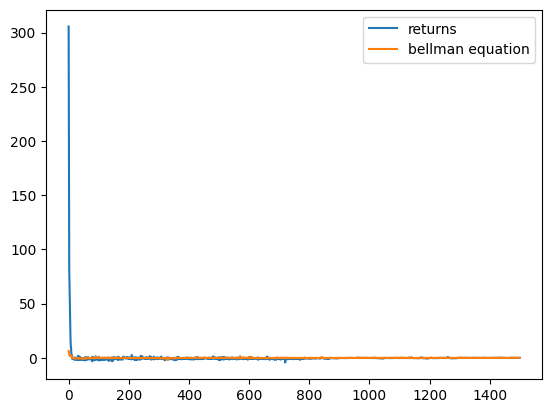

In [15]:
plt.plot(returns_policy_network_losses, label="returns")
plt.plot(bellman_policy_network_losses, label="bellman equation")
plt.legend()

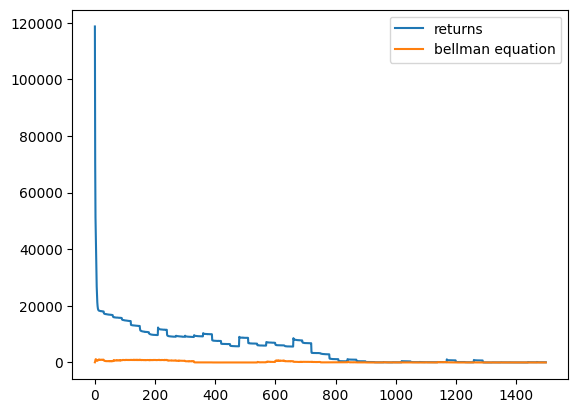

In [16]:
plt.plot(returns_value_network_losses, label="returns")
plt.plot(bellman_value_network_losses, label="bellman equation")
plt.legend()

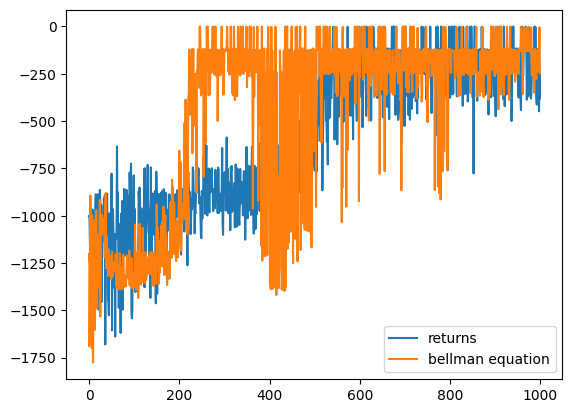

In [17]:
plt.plot([sum(trajectory["rewards"]) for trajectory in returns_history], label="returns")
plt.plot([sum(trajectory["rewards"]) for trajectory in bellman_history], label="bellman equation")
plt.legend()

# Continuous LunarLander

In [18]:
env = gym.make("LunarLander-v2", continuous=True)
env.observation_space.shape[0], env.action_space.shape[0]

(8, 2)

In [19]:
agent = ContinuousDistributionAgent(
    Network([env.observation_space.shape[0], 128, 128, env.action_space.shape[0] * 2]),
    min_action=torch.tensor([-1.0, -1.0]),
    max_action=torch.tensor([1.0, 1.0]),
)

In [21]:
trainer = BellmanEquationBasedPPOTrainer(
    n_episodes=50,
    n_trajectories_per_episode=20,
    n_epochs_per_episode=30,
    epsilon=0.2,
    policy_network_lr=1e-4,
    value_network_lr=5e-4,
    batch_size=32,
    gamma=0.99,
    value_network_hidden_sizes=[env.observation_space.shape[0], 128, 128, 1],
    max_trajectory_length=1000,
)

In [22]:
policy_network_losses, value_network_losses, history = trainer.train(
    agent, env, history_file_path="histories/ContinuousLunarLander-v2_ppo_bellman_equation.jsonl"
)

Layer Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=4, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -282.45


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.015970
Mean value network loss: 79.538258
Episode №2


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -171.21


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.253748
Mean value network loss: 64.618055
Episode №3


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -91.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.301371
Mean value network loss: 33.038670
Episode №4


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -25.88


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.284501
Mean value network loss: 16.074724
Episode №5


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -22.97


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.189560
Mean value network loss: 10.610993
Episode №6


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 11.93


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.130266
Mean value network loss: 4.246864
Episode №7


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 11.96


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.104951
Mean value network loss: 6.426275
Episode №8


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 63.17


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.060097
Mean value network loss: 1.789369
Episode №9


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 65.83


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.051641
Mean value network loss: 2.536988
Episode №10


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 86.28


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.041515
Mean value network loss: 3.893385
Episode №11


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 105.89


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.042803
Mean value network loss: 2.700697
Episode №12


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 109.98


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.024484
Mean value network loss: 0.660810
Episode №13


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 126.94


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.025584
Mean value network loss: 0.901530
Episode №14


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 131.29


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017210
Mean value network loss: 3.831987
Episode №15


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 127.27


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.016134
Mean value network loss: 4.819639
Episode №16


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 135.14


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017968
Mean value network loss: 3.413007
Episode №17


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 145.16


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.021799
Mean value network loss: 6.021490
Episode №18


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 162.84


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.035123
Mean value network loss: 9.096028
Episode №19


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 163.97


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017162
Mean value network loss: 9.308729
Episode №20


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 207.40


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.039638
Mean value network loss: 9.566035
Episode №21


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 188.04


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.021332
Mean value network loss: 9.313460
Episode №22


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 171.43


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.034685
Mean value network loss: 12.537483
Episode №23


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 185.07


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.027006
Mean value network loss: 6.110024
Episode №24


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 205.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.016777
Mean value network loss: 7.013183
Episode №25


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 213.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.036988
Mean value network loss: 8.379554
Episode №26


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 206.13


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.068861
Mean value network loss: 12.584871
Episode №27


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 206.98


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.044501
Mean value network loss: 7.799242
Episode №28


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 199.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.027886
Mean value network loss: 6.672434
Episode №29


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 197.56


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.036848
Mean value network loss: 11.516896
Episode №30


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 177.31


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.024976
Mean value network loss: 13.204257
Episode №31


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 214.72


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.015259
Mean value network loss: 11.921721
Episode №32


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 221.90


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.030571
Mean value network loss: 14.936172
Episode №33


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 214.42


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.020050
Mean value network loss: 16.392019
Episode №34


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 202.61


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031529
Mean value network loss: 9.095094
Episode №35


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 197.74


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.043121
Mean value network loss: 6.125687
Episode №36


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 229.81


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.001622
Mean value network loss: 7.264028
Episode №37


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 196.28


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.030683
Mean value network loss: 12.462166
Episode №38


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 202.93


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.041323
Mean value network loss: 12.964755
Episode №39


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 188.59


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.014159
Mean value network loss: 7.735788
Episode №40


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 225.91


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.023833
Mean value network loss: 15.598444
Episode №41


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 225.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.036424
Mean value network loss: 10.413940
Episode №42


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 212.19


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.022176
Mean value network loss: 8.082516
Episode №43


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 232.06


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.009263
Mean value network loss: 9.796081
Episode №44


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 232.34


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.039654
Mean value network loss: 12.601088
Episode №45


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 227.53


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.000963
Mean value network loss: 9.554073
Episode №46


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 225.18


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.001819
Mean value network loss: 9.204876
Episode №47


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 205.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026217
Mean value network loss: 7.685974
Episode №48


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 215.80


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.050501
Mean value network loss: 14.437433
Episode №49


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 223.79


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031478
Mean value network loss: 12.681067
Episode №50


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 225.94


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.015855
Mean value network loss: 7.251529


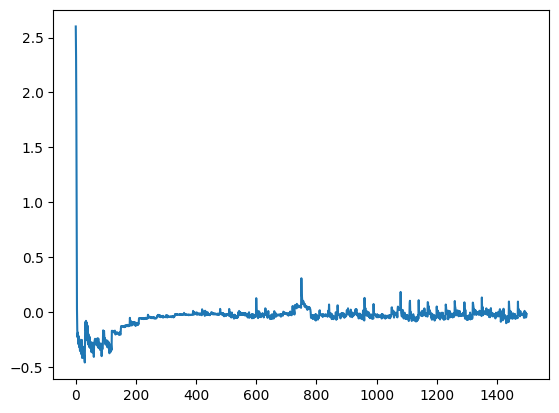

In [23]:
plt.plot(policy_network_losses)

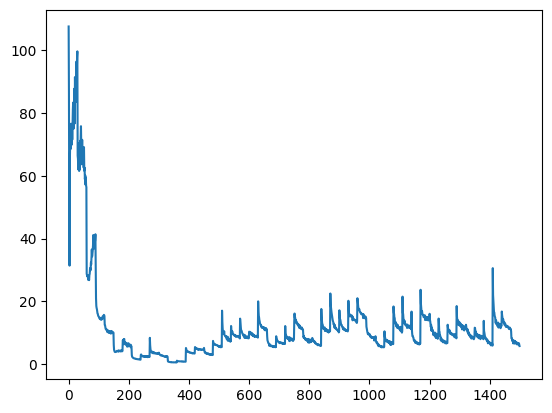

In [24]:
plt.plot(value_network_losses)

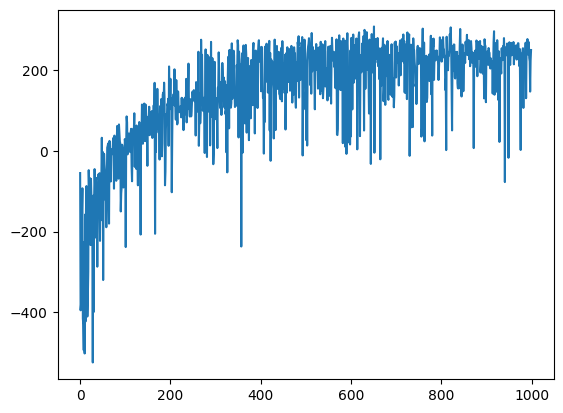

In [25]:
plt.plot([sum(trajectory["rewards"]) for trajectory in history])

In [27]:
agent.save("agents/continuous_lunar_lander_bellman_equation.pth")

# Discrete LunarLander

In [28]:
env = gym.make("LunarLander-v2")

In [31]:
agent = DiscreteDistributionAgent(
    Network([env.observation_space.shape[0], 128, 128, env.action_space.n]),
)

In [32]:
trainer = BellmanEquationBasedPPOTrainer(
    n_episodes=50,
    n_trajectories_per_episode=20,
    n_epochs_per_episode=30,
    epsilon=0.2,
    policy_network_lr=1e-4,
    value_network_lr=5e-4,
    batch_size=32,
    gamma=0.99,
    value_network_hidden_sizes=[env.observation_space.shape[0], 128, 128, 1],
    max_trajectory_length=1000,
)

In [33]:
policy_network_losses, value_network_losses, history = trainer.train(
    agent, env, history_file_path="histories/DiscreteLunarLander-v2_ppo_bellman_equation.jsonl"
)

Layer Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=4, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -181.79


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.108592
Mean value network loss: 70.027934
Episode №2


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -124.58


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.333805
Mean value network loss: 48.240327
Episode №3


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -109.62


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.322152
Mean value network loss: 25.539653
Episode №4


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.15


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.285189
Mean value network loss: 25.726621
Episode №5


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -78.14


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.240710
Mean value network loss: 27.495628
Episode №6


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -131.96


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.205312
Mean value network loss: 17.938910
Episode №7


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -45.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.141617
Mean value network loss: 9.141633
Episode №8


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 13.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.084647
Mean value network loss: 2.807901
Episode №9


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 43.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.045476
Mean value network loss: 0.720712
Episode №10


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 92.44


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031101
Mean value network loss: 1.309456
Episode №11


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 173.96


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.043685
Mean value network loss: 10.902107
Episode №12


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 221.83


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.043880
Mean value network loss: 3.086511
Episode №13


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 202.46


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.059692
Mean value network loss: 7.234900
Episode №14


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 213.12


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.046676
Mean value network loss: 5.689130
Episode №15


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 225.90


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.045509
Mean value network loss: 5.138982
Episode №16


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 184.43


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.062928
Mean value network loss: 6.917108
Episode №17


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 194.11


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.078198
Mean value network loss: 7.417821
Episode №18


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 200.36


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.067278
Mean value network loss: 8.186373
Episode №19


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 181.20


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.054234
Mean value network loss: 9.590678
Episode №20


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 184.18


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.044616
Mean value network loss: 7.412676
Episode №21


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 163.53


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.052764
Mean value network loss: 5.680849
Episode №22


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 185.54


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.036667
Mean value network loss: 10.563469
Episode №23


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 172.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.042025
Mean value network loss: 9.043431
Episode №24


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 182.51


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.051933
Mean value network loss: 8.065029
Episode №25


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 170.28


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.042528
Mean value network loss: 7.635527
Episode №26


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 179.13


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.064883
Mean value network loss: 10.488470
Episode №27


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 198.50


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.037353
Mean value network loss: 9.783290
Episode №28


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 180.02


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.035034
Mean value network loss: 10.259121
Episode №29


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 216.01


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.036560
Mean value network loss: 6.121402
Episode №30


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 226.39


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.038075
Mean value network loss: 4.590089
Episode №31


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 242.18


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031032
Mean value network loss: 8.582599
Episode №32


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 209.94


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.033097
Mean value network loss: 4.245754
Episode №33


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 241.00


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.027940
Mean value network loss: 4.504931
Episode №34


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 254.81


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.035350
Mean value network loss: 6.446020
Episode №35


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 260.60


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.042784
Mean value network loss: 4.176862
Episode №36


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 273.71


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026494
Mean value network loss: 4.062183
Episode №37


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 275.10


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031815
Mean value network loss: 3.345973
Episode №38


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 263.73


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.027048
Mean value network loss: 3.134431
Episode №39


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 261.27


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026076
Mean value network loss: 4.093752
Episode №40


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 261.64


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.030636
Mean value network loss: 4.096521
Episode №41


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 265.04


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.032695
Mean value network loss: 2.891017
Episode №42


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 256.80


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.028893
Mean value network loss: 3.075177
Episode №43


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 269.38


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026495
Mean value network loss: 4.046624
Episode №44


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 280.06


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.029318
Mean value network loss: 3.413336
Episode №45


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 284.16


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.025356
Mean value network loss: 3.250271
Episode №46


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 257.44


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.029547
Mean value network loss: 3.508906
Episode №47


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 284.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.030094
Mean value network loss: 3.366480
Episode №48


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 274.27


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.037234
Mean value network loss: 3.252399
Episode №49


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 266.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.030069
Mean value network loss: 6.116621
Episode №50


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: 283.02


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026961
Mean value network loss: 4.557052


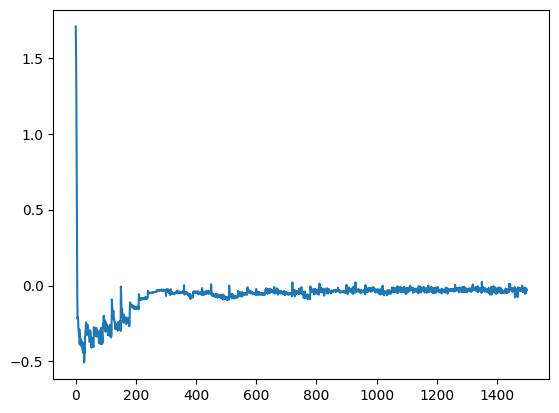

In [34]:
plt.plot(policy_network_losses)

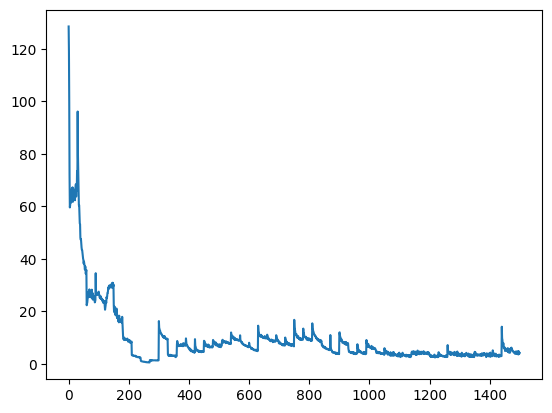

In [35]:
plt.plot(value_network_losses)

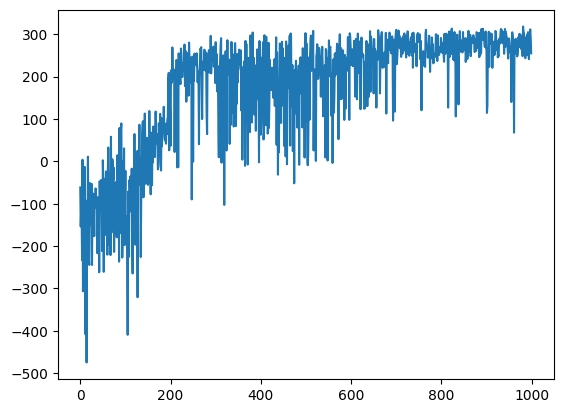

In [36]:
plt.plot([sum(trajectory["rewards"]) for trajectory in history])

In [38]:
agent.save("agents/discrete_lunar_lander_bellman_equation.pth")

# Acrobot

In [39]:
env = gym.make("Acrobot-v1")

In [40]:
agent = DiscreteDistributionAgent(
    Network([env.observation_space.shape[0], 128, 128, env.action_space.n]),
)

In [41]:
trainer = BellmanEquationBasedPPOTrainer(
    n_episodes=50,
    n_trajectories_per_episode=20,
    n_epochs_per_episode=30,
    epsilon=0.2,
    policy_network_lr=1e-4,
    value_network_lr=5e-4,
    batch_size=32,
    gamma=0.99,
    value_network_hidden_sizes=[env.observation_space.shape[0], 128, 128, 1],
    max_trajectory_length=1000,
)

In [42]:
policy_network_losses, value_network_losses, history = trainer.train(
    agent, env, history_file_path="histories/Acrobot-v1_ppo_bellman_equation.jsonl"
)

Layer Sequential(
  (0): Linear(in_features=6, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=3, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -497.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.019698
Mean value network loss: 17.760057
Episode №2


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -389.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.048031
Mean value network loss: 14.276858
Episode №3


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -236.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.090917
Mean value network loss: 9.950782
Episode №4


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -159.60


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.076999
Mean value network loss: 7.600009
Episode №5


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -122.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.074395
Mean value network loss: 6.119310
Episode №6


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -114.50


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.036246
Mean value network loss: 3.820414
Episode №7


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -97.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.031012
Mean value network loss: 3.915945
Episode №8


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -88.40


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.009906
Mean value network loss: 4.640321
Episode №9


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -91.90


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.012121
Mean value network loss: 3.060828
Episode №10


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -93.00


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.014688
Mean value network loss: 3.518572
Episode №11


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -91.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.001759
Mean value network loss: 4.649605
Episode №12


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -114.10


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.026821
Mean value network loss: 7.253678
Episode №13


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.008237
Mean value network loss: 5.412289
Episode №14


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -92.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.000011
Mean value network loss: 4.128272
Episode №15


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -88.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.018441
Mean value network loss: 4.371246
Episode №16


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -79.70


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.012117
Mean value network loss: 3.469224
Episode №17


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -79.10


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.005527
Mean value network loss: 3.267128
Episode №18


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -88.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.015933
Mean value network loss: 3.416528
Episode №19


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -89.55


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.004434
Mean value network loss: 3.459843
Episode №20


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -87.65


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017213
Mean value network loss: 3.133538
Episode №21


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -86.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.004938
Mean value network loss: 4.166588
Episode №22


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.20


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.005334
Mean value network loss: 2.901127
Episode №23


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -93.35


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.014116
Mean value network loss: 4.413405
Episode №24


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -90.60


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.017931
Mean value network loss: 3.627755
Episode №25


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -88.80


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.001329
Mean value network loss: 3.961282
Episode №26


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -89.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.015866
Mean value network loss: 3.427827
Episode №27


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.20


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.001943
Mean value network loss: 3.619060
Episode №28


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -78.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.006058
Mean value network loss: 3.021799
Episode №29


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -86.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.001719
Mean value network loss: 2.797418
Episode №30


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.30


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.000335
Mean value network loss: 2.805775
Episode №31


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -82.05


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.016966
Mean value network loss: 2.902947
Episode №32


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -83.70


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.001148
Mean value network loss: 3.192907
Episode №33


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -83.00


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.008341
Mean value network loss: 3.164876
Episode №34


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -97.50


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.005821
Mean value network loss: 4.662701
Episode №35


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -79.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.003064
Mean value network loss: 3.611494
Episode №36


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.25


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.004181
Mean value network loss: 2.479652
Episode №37


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -102.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.004737
Mean value network loss: 5.179362
Episode №38


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -84.15


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.008105
Mean value network loss: 3.532535
Episode №39


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -84.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.002681
Mean value network loss: 5.624728
Episode №40


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -88.10


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.003706
Mean value network loss: 3.665895
Episode №41


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -78.70


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.005645
Mean value network loss: 3.474847
Episode №42


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -84.95


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.001401
Mean value network loss: 3.218966
Episode №43


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -83.75


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.002674
Mean value network loss: 3.326065
Episode №44


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.65


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.007855
Mean value network loss: 2.884203
Episode №45


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -80.20


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.003451
Mean value network loss: 3.039709
Episode №46


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -77.85


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.004216
Mean value network loss: 2.629185
Episode №47


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -102.15


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.005274
Mean value network loss: 6.114104
Episode №48


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -79.00


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.005902
Mean value network loss: 3.300010
Episode №49


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -81.10


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: 0.003619
Mean value network loss: 2.664439
Episode №50


Sampling trajectories:   0%|          | 0/20 [00:00<?, ?it/s]

Mean total reward: -97.30


Iterating over epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Mean policy network loss: -0.007689
Mean value network loss: 5.647936


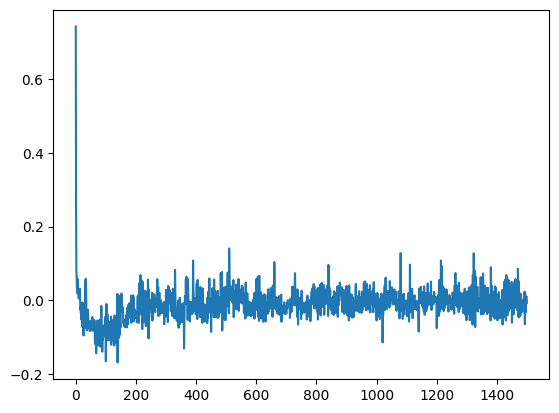

In [43]:
plt.plot(policy_network_losses)

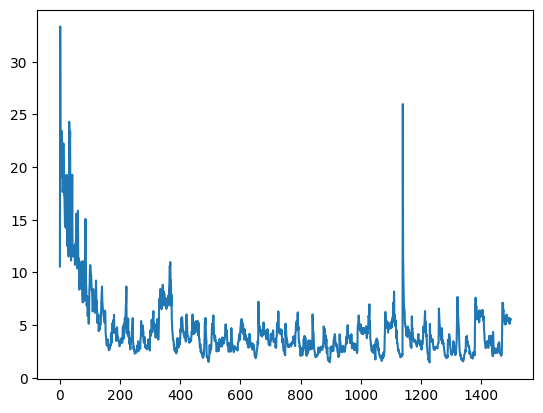

In [44]:
plt.plot(value_network_losses)

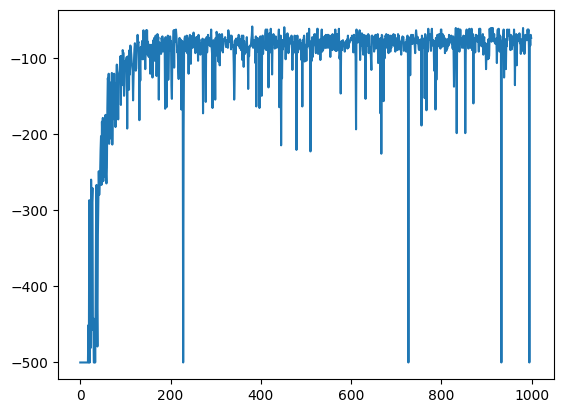

In [45]:
plt.plot([sum(trajectory["rewards"]) for trajectory in history])

In [47]:
agent.save("agents/acrobot_bellman_equation.pth")